In [1]:
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

df = pd.read_csv(url, delimiter=',', header='infer')

df_interest = df.loc[
    df['Country/Region'].isin(['United Kingdom', 'US', 'Italy', 'Germany'])
    & df['Province/State'].isna()]
df_interest.rename(
    index=lambda x: df_interest.at[x, 'Country/Region'], inplace=True)

df1 = df_interest.transpose()
df1 = df1.drop(['Province/State', 'Country/Region', 'Lat', 'Long'])
df1 = df1.loc[(df1 != 0).any(1)]

df1.index = pd.to_datetime(df1.index)
df1.head()

Germany Italy United Kingdom US
2020-02-21       0     1              0  0
2020-02-22       0     2              0  0
2020-02-23       0     3              0  0
2020-02-24       0     7              0  0
2020-02-25       0    10              0  0

## The Animated Line Plot

In [3]:
from IPython.display import HTML

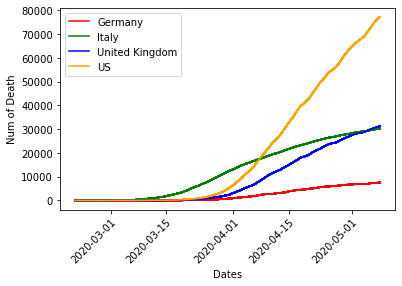

In [4]:
%matplotlib inline
color = ["red", "green", "blue", "orange"]
fig = plt.figure()

plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.subplots_adjust(bottom=0.2, top=0.9)  # ensuring the dates (on the x-axis) fit in the screen
plt.ylabel("Num of Death")
plt.xlabel("Dates")

def build_barchart(i: int):
    plt.legend(df1.columns)
    p = plt.plot(df1[:i].index, df1[:i].values) # note it only returns the dataset, up to the point i
    for i in range(0, 4):
        p[i].set_color(color[i])  # set the color of each curve

animator = ani.FuncAnimation(fig, build_barchart, interval=100)
HTML(animator.to_jshtml())

## The Animated Pie Chart

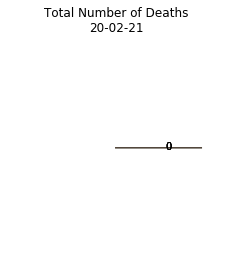

In [5]:
fig, ax = plt.subplots()
explode = [0.01, 0.01, 0.01, 0.01]  # pop out each slice from pie


def build_pie_chart(i: int):
    def absolute_value(val):
        result  = np.round(val/100.*df1.head(i).max().sum(), 0)
        return int(result)
    ax.clear()
    plot = df1.head(i).max().plot.pie(y=df1.columns, autopct=absolute_value, label='',explode = explode, shadow = True)
    plot.set_title('Total Number of Deaths\n' + str(df1.index[min(i, len(df1.index) - 1)].strftime('%y-%m-%d')), fontsize=12)

animator = ani.FuncAnimation(fig, build_pie_chart, interval=200)
HTML(animator.to_jshtml())

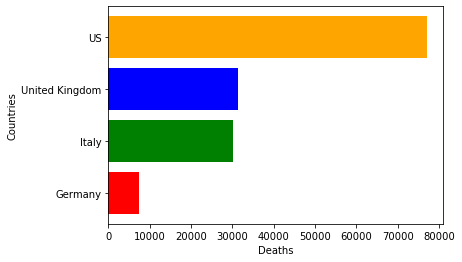

In [6]:
fig = plt.figure()
bar = ""

def build_barchart(i: int):
    iv = min(i, len(df1.index) - 1)
    objects = df1.max().index
    y_pos = np.arange(len(objects))
    performance = df1.iloc[[iv]].values.tolist()[0]

    if bar == "vertical":
        plt.bar(y_pos, performance, align="center", color=["red", "green", "blue", "orange"])
        plt.xticks(y_pos, objects)
        plt.ylabel("Deaths")
        plt.xlabel("Countries")
        plt.title("Deaths per Country\n" + str(df1.index[iv].strftime("%y-%m-%d")))
    else:
        plt.barh(y_pos, performance, align="center", color=["red", "green", "blue", "orange"])
        plt.yticks(y_pos, objects)
        plt.xlabel("Deaths")
        plt.ylabel("Countries")

animator = ani.FuncAnimation(fig, build_barchart, interval=100)
HTML(animator.to_jshtml())